<a href="https://colab.research.google.com/github/zhangyingchengqi/Modern-Computer-Vision-with-PyTorch/blob/master/Chapter02/Building_a_neural_network_using_PyTorch_on_a_toy_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 第二章 第五节 用pytorch构建神经网络

## 神经网络的组成:
  神经网络 = 输入层 + 隐藏层（线性 + 激活） + 输出层  <br />
再配合   损失函数 + 优化器 + 反向传播，形成一个可训练的系统 <br />

<hr />


1.   输入层
  * 作用：接收原始数据（图片像素、文本向量、数值特征等）。
  * 特点：
      * 不做复杂运算，只负责把数据传给下一层
      * 输入的维度 = 特征的数量
2. 隐藏层（Hidden Layers）
  * 作用：执行大部分的特征变换和模式提取
  * 组成
    * 线性变换: z = W x + b
    * 激活函数:
      * 给模型引入非线性，使其能拟合复杂关系。
      * 常见的有 ReLU、Sigmoid、Tanh 等。
    * 隐藏层中的单元数:  该层中神经元的个数，也可以理解为特征变换的维度大小
      1. 单元数量的意义
        * 每个单元（Neuron）在数学上可以看作是一个计算节点，接收上一层所有输入，经过加权求和 + 激活函数得到输出。
        * 单元数量越多，意味着该层可以学习到更多的特征组合，也能拟合更复杂的模式。
        * 但数量太多，会增加参数量和计算量，可能导致过拟合。
      2. 怎么选择单元数:
        * 任务复杂度高 → 单元多（如图像识别、语言建模）
        * 任务简单 → 单元少（如线性回归、低维特征分类）
        * 常见初始选择：
          * 输入特征数的 1~3 倍
          * 或逐层递减（如 128 → 64 → 32）
        * 使用验证集调参，避免过拟合
3. 输出层
  * 作用: 把隐藏层提取的特征映射成最终结果（分类概率、回归数值等）
  * 特点:
    * 输出节点的数量 = 任务类别数（分类）或 1（回归）
    * 激活函数依任务而定:
      * 分类 -> softmax
      * 二分类 -> Sigmod
      * 回归 ->无激活(线性输出)
4. 损失函数
  * 作用: 衡量模型输出与真实标签的差距，是优化的目标
  * 类型:
    * 回归任务 → MSE（均方误差）
    * 二分类 → Binary Cross-Entropy
    * 多分类 → Cross-Entropy Loss
5. 优化器
  * 作用: 根据损失函数的梯度更新权重，让模型逐步收敛
  * 算法:
    * SGD
    * Adam
    * RMSProp
6. 梯度与反向传播
  * 梯度: 损失函数对每个参数的偏导数，表示“这个参数改变一点点，会让损失怎么变”
  * 反向传播: 计算梯度并把它传回每一层，让优化器更新参数














In [1]:
import torch
x = [[1,2],[3,4],[5,6],[7,8]]
y = [[3],[7],[11],[15]]

In [2]:
X = torch.tensor(x).float()
Y = torch.tensor(y).float()

In [3]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
X = X.to(device)
Y = Y.to(device)

In [4]:
import torch.nn as nn # nn模块中包括构建神经网络模型的函数

In [5]:
import torch
import torch.nn as nn

class MyNeuralNet(nn.Module):
    def __init__(self):
        super().__init__()   # 调用父类的构造函数，确保 nn.Module 的内部机制（参数注册、子模块管理等）被正确初始化。
        # 从输入到隐藏层的线性变换（全连接层）
        # 输入特征数 = 2, 隐藏单元数 = 8
        # 这个模块包含权重矩阵 shape=(2,8)（PyTorch 存储为 (out_features, in_features)）和偏置向量 shape=(8,)
        self.input_to_hidden_layer = nn.Linear(2, 8) #  默认使用 Kaiming 均匀初始化（Kaiming Uniform Initialization, He Initialization） 来生成 nn.Linear 的权重，偏置则是均匀分布随机初始化
        # 隐藏层的激活函数：ReLU（Rectified Linear Unit）
        # ReLU 对每个元素 x 输出 max(0, x)，为网络引入非线性，使网络能拟合复杂函数。
        self.hidden_layer_activation = nn.ReLU()   # 指定隐藏层的激活函数
        # 隐藏层到输出层的线性变换（全连接层）
        # 隐藏单元数 = 8, 输出单元数 = 1
        # 该层的权重矩阵 shape=(1,8)，偏置 shape=(1,)
        self.hidden_to_output_layer = nn.Linear(8, 1)  # 输出为原始 logits / 回归值
    def forward(self, x):
        """
        定义前向传播（inference）逻辑。
        约定：x 的形状应为 (batch_size, 2)
        返回：out 的形状为 (batch_size, 1)
        """
        # (batch_size, 2) -> (batch_size, 8)
        x = self.input_to_hidden_layer(x)
        # 应用非线性激活（元素级）
        x = self.hidden_layer_activation(x)
        # (batch_size, 8) -> (batch_size, 1)
        x = self.hidden_to_output_layer(x)
        # 这里返回的通常是“logits”或回归输出；是否再接激活（如 Sigmoid）取决于任务
        return x


#另外一种使用nn.Parameter函数定义神经网络模型
# class MyNeuralNet( nn.Module):
#   def __init__( self ):
#     super().__init__()
#     self.input_to_hidden_layer=nn.Parameter(  torch.rand(2,8) )
#     self.hidden_layer_activation=nn.ReLU()
#     self.hidden_to_output_layer=nn.Parameter(  torch.rand(8,1) )

#   def forward( self,x ):
#     x=x@self.input_to_hidden_layer
#     x=self.hidden_layer_activation(x)
#     x=x@self.hidden_to_output_layer
#     return x

In [6]:
# 总参数量计算（示例）
# 第一层：2 -> 8 ：16（权重） + 8（偏置） = 24
# 第二层：8 -> 1 ：8 + 1 = 9
# 总计：33 个可学习参数
model = MyNeuralNet()
sum( p.numel() for p in model.parameters() if p.requires_grad)  # 输出 33

33

In [7]:
# 输入 / 输出形状
model = MyNeuralNet()
x = torch.randn(4, 2)    # batch_size=4
print("输入:", x)
out = model(x)           # out.shape -> (4, 1)
print("输出:",out)
# 以上代码用于体会输入与输出数据的关系

输入: tensor([[ 0.6742, -1.1191],
        [-0.8387,  0.2271],
        [ 0.2298,  1.4664],
        [-0.0440, -0.7924]])
输出: tensor([[-0.1247],
        [-0.3932],
        [-0.5605],
        [-0.1369]], grad_fn=<AddmmBackward0>)


## 下面将使用标准训练循环基于pytorch完成训练

标准训练循环过程:
1. optimizer.zero_grad()（清除上次梯度）
2. out = model(x)（前向）
3. loss = criterion(out, target)
4. loss.backward()（计算梯度）
5. optimizer.step()（更新参数）

In [8]:
mynet = MyNeuralNet().to(device)
print( "每一层的权重 :",mynet.input_to_hidden_layer.weight)
print( "每一层的偏置 :",mynet.input_to_hidden_layer.bias)
print( "输出层的权重:", mynet.hidden_to_output_layer.weight)
print( "输出层的偏置:", mynet.hidden_to_output_layer.bias )
print("神经网络所有的参数:", list( mynet.parameters() ) )

每一层的权重 : Parameter containing:
tensor([[ 0.0366, -0.3790],
        [-0.6228,  0.0106],
        [ 0.5390, -0.2551],
        [ 0.7063,  0.4921],
        [-0.3300,  0.1168],
        [ 0.3509, -0.2333],
        [ 0.0163,  0.6845],
        [-0.3035, -0.1799]], device='cuda:0', requires_grad=True)
每一层的偏置 : Parameter containing:
tensor([ 0.4502, -0.5981,  0.3658,  0.4050,  0.4422, -0.6693, -0.3296,  0.2118],
       device='cuda:0', requires_grad=True)
输出层的权重: Parameter containing:
tensor([[-0.3302,  0.2144, -0.1389, -0.2016, -0.1385,  0.2089,  0.3125, -0.3027]],
       device='cuda:0', requires_grad=True)
输出层的偏置: Parameter containing:
tensor([0.2121], device='cuda:0', requires_grad=True)
神经网络所有的参数: [Parameter containing:
tensor([[ 0.0366, -0.3790],
        [-0.6228,  0.0106],
        [ 0.5390, -0.2551],
        [ 0.7063,  0.4921],
        [-0.3300,  0.1168],
        [ 0.3509, -0.2333],
        [ 0.0163,  0.6845],
        [-0.3035, -0.1799]], device='cuda:0', requires_grad=True), Parameter con

In [9]:
loss_func = nn.MSELoss() #定义损失函数

In [10]:
_Y = mynet(X)
loss_value = loss_func(_Y,Y)
print(loss_value)

tensor(104.5324, device='cuda:0', grad_fn=<MseLossBackward0>)


In [11]:
from torch.optim import SGD #定义优化器
opt = SGD(mynet.parameters(), lr = 0.001) #优化的目标是 mynet的各个参数, 学习率为 0.001

In [12]:
loss_history = []
for _ in range(50):
    opt.zero_grad() # flush the previous epoch's gradients
    loss_value = loss_func(mynet(X),Y)  # compute loss
    loss_value.backward()     # perform backward
    opt.step()            #update the weights according to the gradients computed
    loss_history.append(loss_value.item())

Text(0, 0.5, 'loss value')

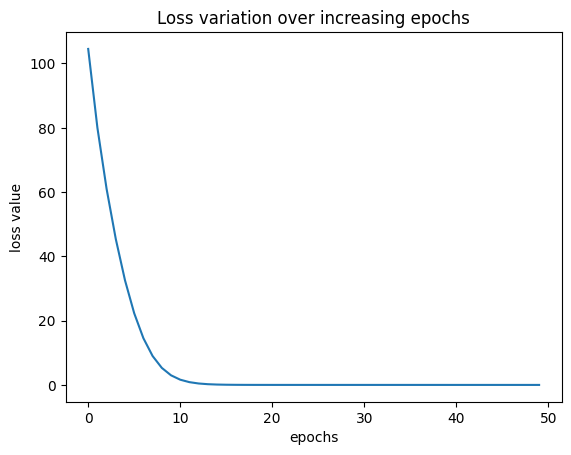

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(loss_history)
plt.title('Loss variation over increasing epochs')
plt.xlabel('epochs')
plt.ylabel('loss value')
#总体损失值随着轮数的增加而减少的方式更新权重